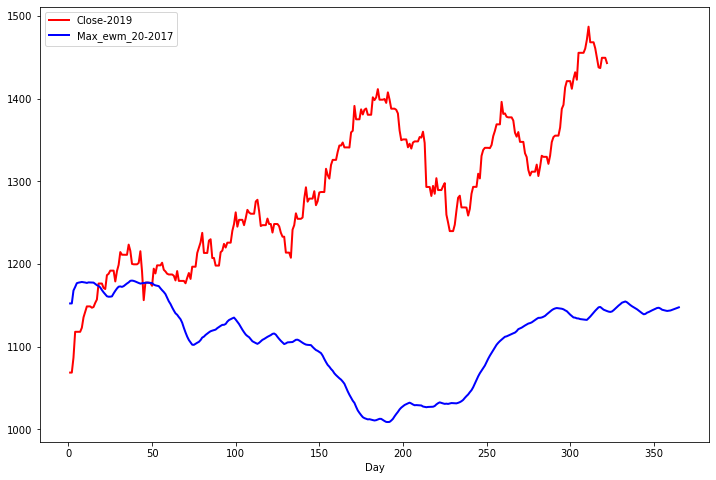

Индекс РТС по закрытию окончательно превысил экспоненциальное среднее за 20 дней
максимальных показателей за аналогичный день 2017 года 19 февраля 2019 года.


In [1]:
'''Используя данные индекса РТС за последние годы
https://video.ittensive.com/python-advanced/rts-index.csv
постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.
Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.
Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году
было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год
и графика для среднего за 2017 год).'''

import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv", delimiter=",")
data['Date'] = pd.to_datetime(data['Date'], format="%d.%m.%Y")

dates = pd.date_range(min(data["Date"]), max(data["Date"]))
data = data.set_index("Date")
data = data.reindex(dates).ffill()

data['Day'] = pd.to_datetime(data.index).dayofyear
data.index.name = "Date"

data_2019 = data["2019"].reset_index().set_index("Day")
data_2017 = data["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean().round(2)

fig = plt.figure(figsize=(12,8))
area = fig.add_subplot(1, 1, 1)
data_2019['Close'].plot(ax=area, color="red", label="Close-2019", lw=2)
data_2017.plot(ax=area, color="blue", label="Max_ewm_20-2017", lw=2)
plt.legend()
plt.show()

data_fall = data_2019[data_2019['Close'] < data_2017[0:len(data_2019)]]

data_fall = data_fall.sort_values('Date', ascending=False)
data_fall['year'] = data_fall['Date'].dt.year
data_fall['month'] = data_fall['Date'].dt.month
data_fall['day'] = data_fall['Date'].dt.day

month_dict = {1:'января', 2:'февраля', 3:'марта', 4:'апреля', 5:'мая', 6:'июня',
              7:'июля', 8:'августа', 9:'сентября', 10:'октября', 11:'ноября', 12:'декабря'}
print('Индекс РТС по закрытию окончательно превысил экспоненциальное среднее за 20 дней')
print('максимальных показателей за аналогичный день 2017 года',
       data_fall['day'].values[0], month_dict[data_fall['month'].values[0]], data_fall['year'].values[0], 'года.')